# 1.3 Nonlinear fit

In [387]:
import numpy as np
import scipy as scp
from scipy.stats import chi2
from scipy.optimize import curve_fit,minimize
from scipy.special import gammainc
import matplotlib.pyplot as plt
import random

Assume N data pairs ${Y_i,t_i}$ to which we model a function $g(\textbf{a} ,t_i)$ with an unknown M-component parameter vector $\textbf{a}$ is to be fitted.

The best set of parameters can be obtained by finding the components that minimize the quadratic deviation $\chi^2$, where $\chi^2(a) = $$\sum_{i=1}^{N} [\frac{Y_i - g(\textbf{a},t_i))}{\sigma_i}]^2 $$ $

In [388]:
def generate_data(t,N,M,a,om,phi,b):
    y = a * np.sin(om*t+phi)* np.exp(-b*t)
    rnd = np.random.RandomState()
    error = 0.2 *rnd.randn(t.size)
    
    for i in range(1,len(error)):
        c = random.randint(0,t.size-1)
        error[c] *= random.random() * (1 if random.random() < 0.5 else -1)
    return y+error

In [391]:
def chisquare(a,om,phi,b):
#     a,om,phi,b = params
    N = 11
    M = 4
    t = np.linspace(0,3*np.pi,N)
    tmodel = np.linspace(0,3*np.pi,1000)
    ymodel = model(t,a,om,phi,b)
    ydata = generate_data(t,N,M,a,om,phi,b)
    sigma2 = 2/150 #as given by the book
    sigma = np.sqrt(sigma2)
    
    s = 0
    error = ydata - ymodel
    for i in range(len(error)):
        s += (error[i]/sigma)**2
        
    guess = [a,om,phi,b]
    params, pcov = curve_fit(model,t,ydata,p0 =guess)
    
    plt.plot(tmodel,model(tmodel,*guess),label='model',lw=0.7)
    plt.scatter(t,ydata,label='data',color='purple')
    plt.plot(t,model(t,*params),label='fit')

    plt.xlabel('t')
    plt.ylabel('f[t]')
    plt.legend(loc='lower right')
    plt.show()
    print("Curve fit(a,om,phi,b):",params)
#     print("Chisquare function:",s)
    return s

In [392]:
def chi2prob(xo,N,M):
    a = (N-M)/2
    return gammainc(a,xo/2)

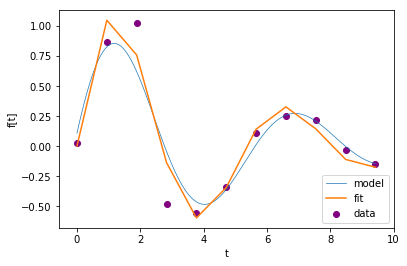

Curve fit(a,om,phi,b): [1.44767265 1.17354575 0.0016705  0.22426596]
Chi2 function: 28.511853363979395
P_7: 0.9998224552063443


In [396]:
N = 11
M = 4

a = 1.1
om = 1.1
phi = .1
b = .2

xo=chisquare(a,om,phi,b)
print("Chi2 function:",xo)
print("P_%d:"%(N-M),chi2prob(xo,N,M))

The $\chi^2$ density distribution with seven degrees of freedom is shown below.

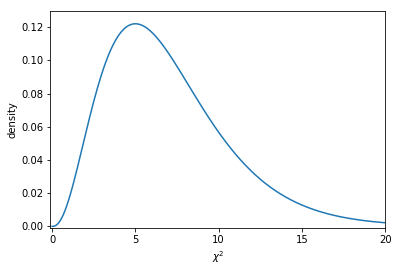

In [369]:
fig, ax = plt.subplots(1, 1)
df =7
xc = np.linspace(0,20,1000)
ax.plot(xc, chi2.pdf(xc, df),label='chi2 pdf')
#plt.legend()
plt.ylabel("density")
plt.xlabel("$\chi^2$")
plt.xticks(range(0,25,5))
plt.xlim(-0.1,20)
plt.ylim(-0.001,0.13)
plt.show()

In order to show a $\chi^2$ distribution, we must generate random variates based on the distribution and plot the PDF.Then, we obtain the interval of confidence by using the  percentile function

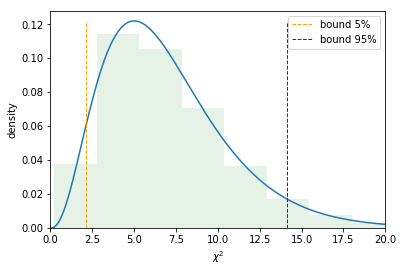

IOC for alpha 5% to 95%: ( 2.1193690393827964 , 14.159153967159337 )


In [370]:
nsize = 3000
xc = np.linspace(0,20,nsize)
rv = chi2(df)
plt.plot(xc,rv.pdf(xc))
r = chi2.rvs(df, size=nsize)
b1,b2 = np.percentile(r,[5,95])
plt.hist(r, density=True, histtype='stepfilled', alpha=0.1,color='green')
plt.plot([b1]*50,np.linspace(0,max(rv.pdf(xc)),50),'--',lw=1,color='orange',label='bound 5%')
plt.plot([b2]*50,np.linspace(0,max(rv.pdf(xc)),50),'--',lw=1,color='purple',label='bound 95%')
plt.xlim(0,20)
plt.xlabel("$\chi^2$")
plt.ylabel("density")
plt.legend(loc='upper right')
plt.show()

print("IOC for alpha 5% to 95%:","(",b1,',',b2,')')

In [475]:
def chisquare2(N,M,a,om,phi,b):
#     a,om,phi,b = params
#     N = 11
#     M = 4
    t = np.linspace(0,3*np.pi,N)
    tmodel = np.linspace(0,3*np.pi,1000)
    ymodel = model(t,a,om,phi,b)
    ydata = generate_data(t,N,M,a,om,phi,b)
    sigma2 = 2/150 #as given by the book
    sigma = np.sqrt(sigma2)
    
    s = 0
    error = ydata - ymodel
    for i in range(len(error)):
        s += (error[i]/sigma)**2
        
    guess = [a,om,phi,b]
    params, pcov = curve_fit(model,t,ydata,p0 =guess)
    fitmodel = model(t,*params)
#     plt.plot(tmodel,model(tmodel,*guess),label='$y = Asin (\omega t) + \phi) e^{-bt}$',lw=0.7)
#     plt.scatter(t,ydata,label='data',color='purple')
#     plt.plot(t,fitmodel,label='fit') #y = '+str(params[0])+'sin ('+str(params[1])+'t) + '+str(params[2]) +'exp{'+str([params[3]])+'t}')
    sfit = 0
    errorfit = fitmodel-ymodel
    for i in range(len(errorfit)):
        sfit+=(errorfit[i]/sigma)**2
        
#     plt.xlabel('t')
#     plt.ylabel('f[t]')
#     plt.legend(loc='lower right')
#     plt.show()
#     print("Curve fit(a,om,phi,b):",params)
#     print("Chisquare function:",s)
#     print("Chisquare function(fit):",sfit)
    return s-sfit

Z: [[0.55681256 0.91652843 0.99378656 0.31947235 0.65721304 0.23990623
  0.8852793  0.76121967 0.99994792 0.92242923 0.72450486]
 [0.69114935 0.99591497 0.2270359  0.99983899 0.99862038 0.51934011
  0.79774206 0.89885054 0.2441493  0.99999952 0.99923684]
 [0.66345611 0.97930433 0.981424   0.63043021 0.99979564 0.9601753
  0.93371158 0.84172887 0.9999146  0.8346585  0.67833464]
 [0.2485546  0.99995437 0.99999959 0.99748719 0.98077722 0.4917868
  0.98667356 0.94501794 0.87994106 0.95782474 0.59783452]
 [0.92274932 0.70952536 0.98992208 0.80128185 0.8823722  0.98302992
  0.09585266 0.88882861 0.38198681 0.9865263  0.84860835]
 [0.99897501 0.98677718 0.99980145 0.87085513 0.9981862  0.736785
  0.91092821 0.07178092 0.95166634 1.         0.99832716]
 [0.33579439 0.92237295 0.97137581 0.99966528 0.9066272  0.99169311
  0.94818521 0.93685079 0.95088472 0.99955336 0.6361291 ]
 [0.83365772 0.98516092 0.96651141 0.99980523 0.6850353  0.95735283
  0.99941074 0.95479669 0.99364882 0.58480034 0.836

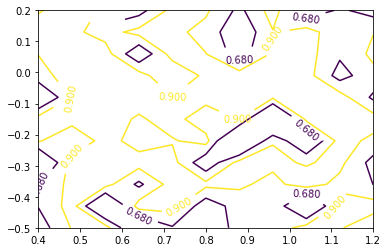

In [489]:
df = 4
N =11
M =7
x = np.linspace(0.4,1.2,N)
y = np.linspace(-0.5,.2,N)
X,Y = np.meshgrid(x,y)
vchi = np.vectorize(chisquare2)
marked = [0.68,0.90]
Z = chi2prob(vchi(N,M,X,om,phi,Y),N,M)
print("Z:",Z)
print("shape:",Z.shape)
f,ax = plt.subplots(1)
CS = ax.contour(X,Y,Z,marked)
ax.clabel(CS, inline=1,fontsize=10)
plt.show()